In [ ]:
#Import necessary libraries

In [15]:
# Import libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display plots inside the notebook
%matplotlib inline

# Set Seaborn style
sns.set(style="whitegrid")


In [ ]:
#Load the dataset

In [16]:
# Load the Excel file (make sure the file is in the same folder as the notebook)
df = pd.read_excel("HASISS Soufien.xlsx", sheet_name="bank_loans")

# Preview the first rows
df.head()


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.13500686,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.23756263,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.54588365,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.73120146,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.00830022,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
#Data cleaning

In [17]:
# Remove invalid rows: 'Interest Rate' should be string or numeric
df = df[df["Interest Rate"].apply(lambda x: isinstance(x, str))]

# Convert 'Interest Rate' column to float
df["Interest Rate"] = df["Interest Rate"].astype(float)

# Check for missing values
missing = df.isnull().sum()
print("Missing values in each column:\n", missing)

# Display data types
print("\nData types:\n", df.dtypes)

Missing values in each column:
 ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type

In [ ]:
#Descriptive statistics (EDA)

In [20]:
# Display summary statistics of numerical columns
print("Summary statistics:\n")
print(df.describe())

Summary statistics:

                 ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count  6.745800e+04  67458.000000   67458.000000            67458.000000   
mean   2.562642e+07  16848.778203   15770.768967            14622.069879   
std    2.109138e+07   8367.938073    8151.225550             6785.494239   
min    1.297933e+06   1014.000000    1014.000000             1114.590204   
25%    6.569634e+06  10012.000000    9266.000000             9831.587446   
50%    1.791332e+07  16073.000000   13042.000000            12793.755870   
75%    4.271334e+07  22106.500000   21793.000000            17809.272575   
max    7.224578e+07  35000.000000   34999.000000            34999.746430   

               Term  Interest Rate  Home Ownership  Delinquency - two years  \
count  67458.000000   67458.000000    67458.000000             67458.000000   
mean      58.173797      11.846421    80541.907702                 0.327137   
std        3.327561       3.718694    45028.860903       

In [ ]:
#Visualizations & Insights

In [ ]:
#Distribution of Loan Amount

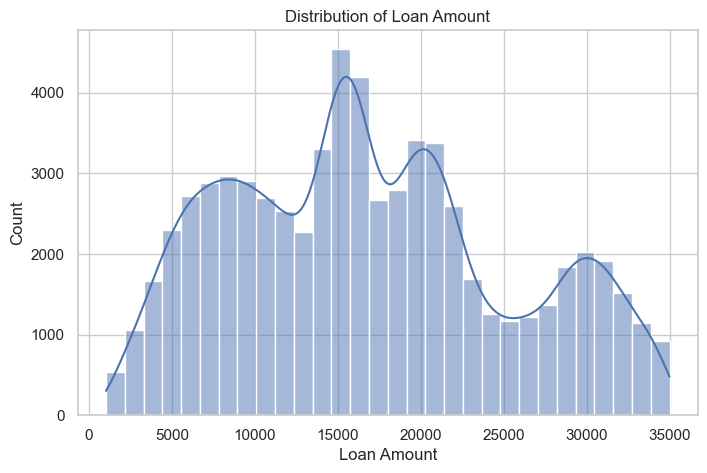

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Loan Amount"], bins=30, kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

In [ ]:
#Insight: Most loans are between $10,000 and $20,000.

In [ ]:
#Distribution of Interest Rate

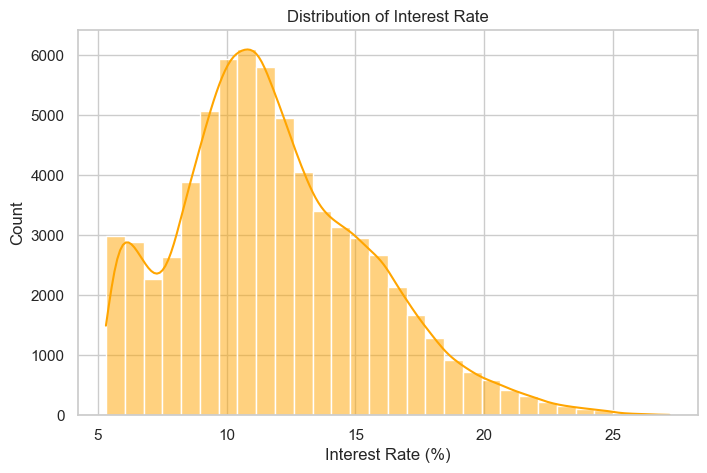

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Interest Rate"], bins=30, kde=True, color="orange")
plt.title("Distribution of Interest Rate")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Count")
plt.show()

In [ ]:
#Insight: Most interest rates are between 10% and 15%.

In [ ]:
#Loan Term Distribution

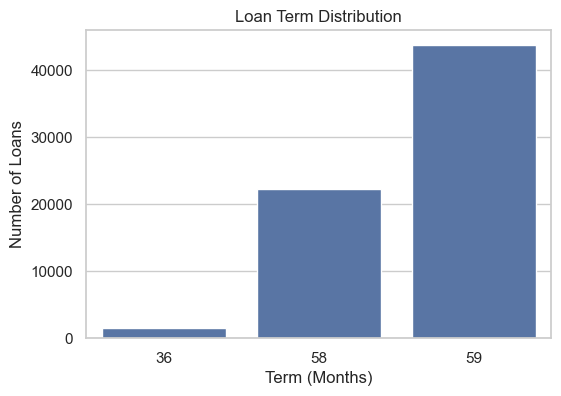

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Term")
plt.title("Loan Term Distribution")
plt.xlabel("Term (Months)")
plt.ylabel("Number of Loans")
plt.show()

In [ ]:
#Insight: The 59-month loan is the most common.

In [ ]:
#Average Loan Amount by Credit Grade

C:\Users\Souien\AppData\Local\Temp\ipykernel_15572\1749486884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Grade", y="Loan Amount", estimator=np.mean, palette="viridis")


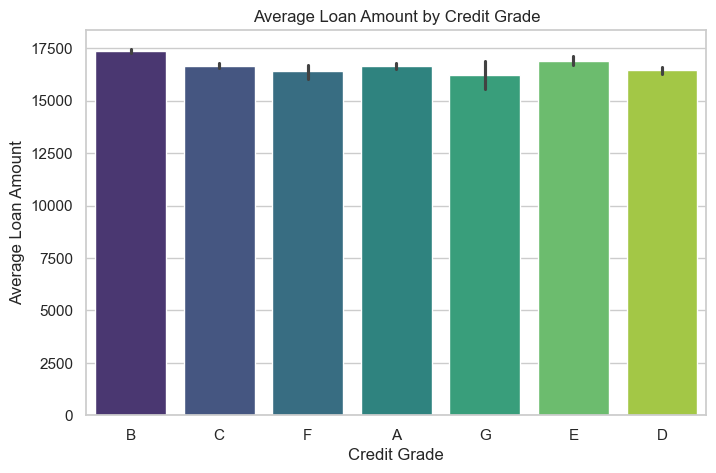

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Grade", y="Loan Amount", estimator=np.mean, palette="viridis")
plt.title("Average Loan Amount by Credit Grade")
plt.xlabel("Credit Grade")
plt.ylabel("Average Loan Amount")
plt.show()

In [ ]:
#Insight: Grade A/B clients receive higher loan amounts on average.

In [ ]:
# Relationship between Interest Rate and Loan Amount

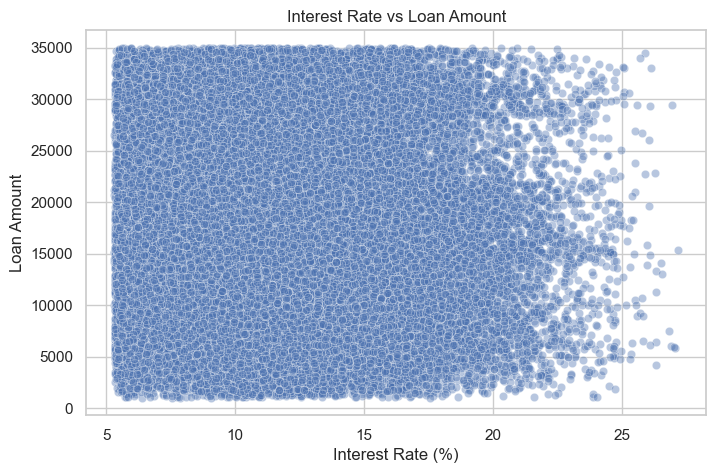

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Interest Rate", y="Loan Amount", alpha=0.4)
plt.title("Interest Rate vs Loan Amount")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Loan Amount")
plt.show()

In [ ]:
#Insight: No strong correlation between loan size and interest rate.